In [30]:
import pandas as pd
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
# mnist 데이터셋 로드
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

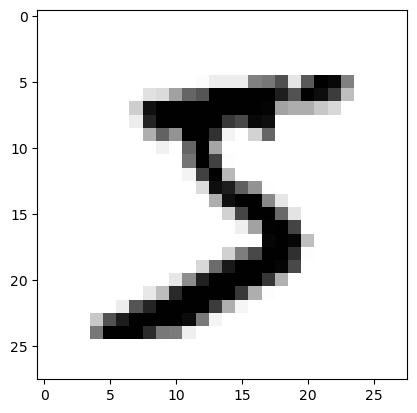

In [3]:
plt.imshow(x_train[0], cmap = "gray_r")
plt.show()

In [4]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [5]:
y_train[0]

5

In [7]:
scaled_train = x_train.reshape(-1, 28, 28, 1) / 255
scaled_test = x_test.reshape(-1, 28, 28, 1) / 255

# 합성곱 신경망 설정

In [18]:
model = keras.Sequential()

In [19]:
model.add(keras.layers.Conv2D(32, kernel_size = 3, activation = "relu", input_shape = (28, 28, 1)))
model.add(keras.layers.MaxPool2D(2)) 

model.add(keras.layers.Conv2D(64, kernel_size = 3, activation = "relu"))
model.add(keras.layers.MaxPool2D(2))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation = "relu"))
model.add(keras.layers.Dropout(0.4))

model.add(keras.layers.Dense(10, activation = "softmax"))

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [20]:
model.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [21]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 4, restore_best_weights = True)

In [22]:
x_sub, x_val, y_sub, y_val = train_test_split(scaled_train, y_train, test_size = 0.2, stratify = y_train, random_state = 12)

In [23]:
history = model.fit(x_sub, y_sub, validation_data = (x_val, y_val), epochs = 30, callbacks = [early_stopping_cb])

Epoch 1/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8547 - loss: 0.4629 - val_accuracy: 0.9812 - val_loss: 0.0619
Epoch 2/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9725 - loss: 0.0897 - val_accuracy: 0.9807 - val_loss: 0.0618
Epoch 3/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9816 - loss: 0.0620 - val_accuracy: 0.9860 - val_loss: 0.0469
Epoch 4/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9850 - loss: 0.0491 - val_accuracy: 0.9888 - val_loss: 0.0390
Epoch 5/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9881 - loss: 0.0389 - val_accuracy: 0.9902 - val_loss: 0.0338
Epoch 6/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9900 - loss: 0.0322 - val_accuracy: 0.9891 - val_loss: 0.0332
Epoch 7/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9911 - loss: 0.0263 - val_accuracy: 0.9905 - val_loss: 0.0347
Epoch 8/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9926 - loss: 0.0238 - 

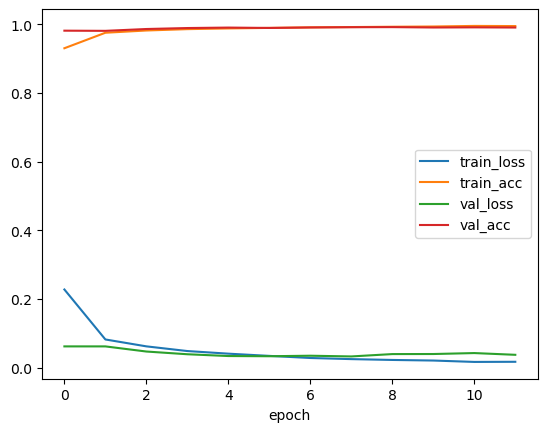

In [24]:
plt.figure()

plt.plot(history.history["loss"], label = "loss")
plt.plot(history.history["accuracy"], label = "acc")
plt.plot(history.history["val_loss"], label = "val_loss")
plt.plot(history.history["val_accuracy"], label = "val_acc")

plt.legend(("train_loss", "train_acc", "val_loss", "val_acc"))
plt.xlabel("epoch")
plt.show()

In [25]:
model.evaluate(scaled_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9914 - loss: 0.0297


[0.025838425382971764, 0.9926000237464905]

In [26]:
preds = model.predict(scaled_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [27]:
preds.shape

(10000, 10)

In [28]:
preds[0]

array([2.5802470e-12, 6.9301129e-09, 8.2962009e-10, 1.8568755e-10,
       1.2784611e-11, 1.2574474e-12, 2.2022473e-15, 1.0000000e+00,
       4.7107662e-11, 1.2995790e-09], dtype=float32)

In [31]:
pred_arr = np.argmax(preds, axis = 1)

In [32]:
pred_arr

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [33]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [34]:
x_match = []

for idx, item in enumerate(pred_arr):
    if item != y_test[idx]:
        x_match.append(idx)

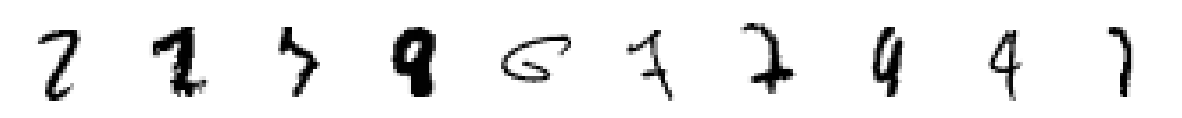

In [37]:
fig, axs = plt.subplots(1, 10, figsize = (15, 15))

for i, item in enumerate(x_match[:10]):
    axs[i].imshow(x_test[item], cmap = "gray_r")
    axs[i].axis("off")
    
plt.show()

In [38]:
y_test[x_match[:10]]

array([2, 2, 7, 8, 6, 7, 7, 9, 4, 7], dtype=uint8)